In [1]:
from pylab import *
import numpy as np
import pandas as pd
import random
import math

In [2]:
def g(x):
    res=1/(1+math.exp(-x))
    return res

In [3]:
def dg(x):
    res=-math.exp(x)/(1+math.exp(x))**2
    return res

In [4]:
def data2mat(data, N, M):
    # get the indicator function
    I= [ [ 0 for i in range(M) ] for j in range(N) ]
    for d in data:
        u=d[0]
        i=d[1]
        r=d[2]
        I[u][i]=1
    I=np.array(I)   
    return I

In [5]:
def SGD(train,test,N,M,Level,eta,K,lambda_1,lambda_2,lambda_3,Step):
    # train: train data
    # test: test data
    # N:the number of user
    # M:the number of item
    # Level:the max value of rating
    # eta: the learning rata
    # K: the number of latent factor
    # lambda_1,lambda_2,lambda_3: regularization parameters
    # Step: the max iteration
    Y = np.random.normal(0, 1, (N, K))
    V = np.random.normal(0, 1, (M, K))
    W = np.random.normal(0, 1, (M, K))
    U = Y
    I = data2mat(train, N, M) # get the indicator function
    rmse=[]
    rms=RMSE(U,V,test,Level)
    rmse.append(rms)
    for ste in range(Step):
        for data in train:
            u=data[0]
            i=data[1]
            r=data[2]
            rui=(r-1)/(Level-1);

            Iu=I[u]
            Yu=Y[u]
            Vi=V[i]

            U[u]=Yu+np.dot(Iu,W)/sum(Iu)
            Uu=U[u]
            
            gui=g(np.dot(Uu,Vi.T))
            dgui=dg(np.dot(Uu,Vi.T))
            eui=rui- gui
            
            Y[u]=(1-eta*lambda_1)*Yu+eta*eui*dgui*Vi
            V[i]=(1-eta*lambda_2)*Vi+eta*eui*dgui*Uu
            W=(1-eta*lambda_3)*W+eta*eui/sum(Iu)*np.tile(Vi,(M,1))

        rms=RMSE(U,V,test,Level)
        rmse.append(rms)
        
        print(ste)
    return rmse,U,V

In [6]:
def RMSE(U,V,test,Level):
    count=len(test)
    sum_rmse=0.0
    for t in test:
        u=t[0]
        i=t[1]
        r=t[2]
        pr= g(np.dot(U[u],V[i].T))*(Level-1)+1
        sum_rmse+=np.square(r-pr)
    rmse=np.sqrt(sum_rmse/count)
    return rmse

In [13]:
def Load_data():
    
    data_df = pd.read_pickle('data.pkl')
    N = data_df.user_id.nunique()
    M = data_df.item_id.nunique()
    
    train_df = pd.read_pickle('train.pkl')
    train_df = list(train_df.values)
    for i in range(len(train_df)):
        train_df[i] = list(train_df[i])
    
    test_df = pd.read_pickle('test.pkl')
    test_df = list(test_df.values)
    for i in range(len(test_df)):
        test_df[i] = list(test_df[i])
    
    return N,M,train_df,test_df

In [14]:
def Figure(rmse):
    fig=plt.figure('RMSE')
    x = range(len(rmse))
    plot(x, rmse, color='r',linewidth=3)
    plt.title('Convergence curve')
    plt.xlabel('Iterations')
    plt.ylabel('RMSE')
    show()

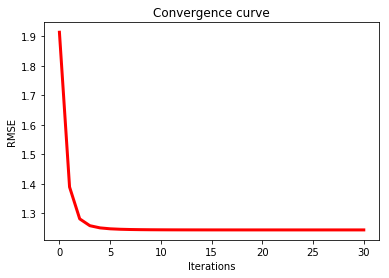

In [17]:
N,M,train,test=Load_data()
level = 5
gamma=0.005
D=10
lambda_1=1
lambda_2=1
lambda_3=1
Step=30
rmse,U,V=SGD(train,test,N,M,level,gamma,D,lambda_1,lambda_2,lambda_3,Step)
print(rmse[-1])
Figure(rmse)